In [1]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', 500)

In [83]:
# load_seasons
def load(url):
    html = pd.read_html(url, header=1)
    df = html[0]
    return df

In [73]:
#read data and create a dataframe
#url = "https://fbref.com/en/comps/685/defense/Copa-America-Stats#stats_squads_defense_for::17"
url = "https://fbref.com/en/comps/676/defense/UEFA-Euro-Stats#stats_squads_defense_for"
df = load(url)
df["Squad"] = df["Squad"].apply(lambda x: x.split(" ")[-1])

In [74]:
#url = "https://fbref.com/en/comps/685/possession/Copa-America-Stats#stats_squads_possession_for::2"
url = "https://fbref.com/en/comps/676/possession/UEFA-Euro-Stats#stats_squads_possession_for"
df_pos = load(url)
df_pos["Squad"] = df_pos["Squad"].apply(lambda x: x.split(" ")[-1])

In [75]:
df

,Squad,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Austria,22,4.3,85,59,47,33,5,28,66,42.4,38,751,268,35.7,234,337,180,69,20,0,49,58,143,81,2
1,Belgium,24,5.0,80,52,46,29,5,33,71,46.5,38,579,138,23.8,219,232,128,71,27,0,44,53,133,94,1
2,Croatia,21,4.3,52,28,27,19,6,14,39,35.9,25,794,200,25.2,273,357,164,47,10,0,37,63,115,92,0
3,Republic,21,5.0,71,41,28,30,13,24,79,30.4,55,739,202,27.3,231,345,163,68,21,0,47,78,149,162,1
4,Denmark,21,5.0,58,31,26,27,5,17,50,34.0,33,553,176,31.8,149,263,141,62,13,1,49,72,130,124,0
5,England,21,5.0,48,25,17,22,9,12,43,27.9,31,792,199,25.1,206,391,195,61,16,1,45,79,127,94,2
6,Finland,19,3.0,55,29,36,12,7,22,46,47.8,24,579,133,23.0,284,225,70,47,12,0,35,44,99,113,0
7,France,21,4.3,75,43,39,26,10,26,46,56.5,20,599,167,27.9,208,280,111,48,7,0,41,52,127,62,0
8,Germany,19,4.0,62,43,25,25,12,19,55,34.5,36,499,147,29.5,131,235,133,42,6,0,36,49,111,60,0
9,Hungary,18,3.0,61,40,47,11,3,17,54,31.5,37,441,119,27.0,254,144,43,58,11,0,47,47,108,78,2


In [76]:
df_pos

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Austria,22,53.8,4.3,2805,279,873,1396,731,94,2596,37,64,57.8,38,4,1851,10015,5313,212,74,15,52,49,2144,1891,88.2,161
1,Belgium,24,53.6,5.0,3556,381,1123,1835,802,102,3341,60,100,60.0,65,4,2543,12032,6263,270,73,24,59,58,2935,2620,89.3,147
2,Croatia,21,49.5,4.3,2540,299,910,1268,532,82,2362,46,65,70.8,49,3,1695,9026,4892,204,60,21,67,46,2040,1767,86.6,108
3,Republic,21,48.0,5.0,2802,304,930,1302,727,96,2589,34,53,64.2,36,1,1682,8885,4381,183,58,10,54,47,2102,1679,79.9,137
4,Denmark,21,55.6,5.0,3178,225,795,1621,936,176,2956,41,77,53.2,43,3,2106,10095,5748,268,75,32,60,45,2504,2135,85.3,179
5,England,21,52.8,5.0,3206,315,940,1729,731,102,3018,36,65,55.4,38,7,2217,11171,5470,203,65,17,55,44,2672,2349,87.9,125
6,Finland,19,37.7,3.0,1557,274,718,632,293,37,1443,16,37,43.2,18,1,934,4289,2134,62,27,6,31,28,1130,928,82.1,60
7,France,21,52.8,4.3,2872,213,734,1581,757,93,2712,43,84,51.2,47,6,2028,9815,5317,222,71,20,43,50,2357,2132,90.5,157
8,Germany,19,62.3,4.0,3065,207,770,1617,897,110,2920,21,43,48.8,23,3,2153,10556,5453,269,83,13,48,42,2616,2347,89.7,186
9,Hungary,18,29.7,3.0,1317,280,733,490,158,20,1185,26,42,61.9,28,2,713,3661,1914,53,11,2,42,47,904,719,79.5,35


In [121]:
#clean data and adjust it to the possession of each team
def clean_data(df1, df2, mode):

    #calculate % tackles won
    df1["Tackles Won%"] = round((df1['TklW'] / df['Tkl']) * 100,1)

    if mode == 'squad':
        #calculate minutes played
        df1['Minutes played'] = df1['90s'] * 90

        #adjust metrics by minutes played if needed
        cols = ['90s', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Press', 'Succ']
        df_90 = df1[cols].apply(lambda x: x / df1['90s'])

        df_90[['Squad','Minutes played', '90s']] = df1[['Squad','Minutes played', '90s']]

        #get only pos from pos df
        df_pos = df2[["Squad", "Poss"]]

        #merge posession df with defensive df
        df_defensive = pd.merge(df_pos, df_90, on='Squad')

    elif mode == 'matches':
        
        #get only pos from pos df
        df_pos = df2[["Date", "Poss"]]

        #merge posession df with defensive df
        df_defensive = pd.merge(df_pos, df1, on='Date')

    #create new columns in order to adjust for defensive actions by posession
    df_defensive['Pos_sig'] = 1 + np.exp(-0.1*(df_defensive['Poss']-50))
    df_defensive['Tkl_adj'] = (2 * df_defensive['Tkl'])/df_defensive['Pos_sig']
    df_defensive['TklW_adj'] = (2 * df_defensive['TklW'])/df_defensive['Pos_sig']
    df_defensive['Tkl_mid_adj'] = (2 * df_defensive['Mid 3rd'])/df_defensive['Pos_sig']
    df_defensive['Tkl_att_adj'] = (2 * df_defensive['Att 3rd'])/df_defensive['Pos_sig']
    df_defensive['Tkl_def_adj'] = (2 * df_defensive['Def 3rd'])/df_defensive['Pos_sig']
    df_defensive['Press_mid_adj'] = (2 * df_defensive['Mid 3rd.1'])/df_defensive['Pos_sig']
    df_defensive['Press_att_adj'] = (2 * df_defensive['Att 3rd.1'])/df_defensive['Pos_sig']
    df_defensive['Press_def_adj'] = (2 * df_defensive['Def 3rd.1'])/df_defensive['Pos_sig']
    df_defensive['Press_adj'] = (2 * df_defensive['Press'])/df_defensive['Pos_sig']
    df_defensive['Press_Suc_adj'] = (2 * df_defensive['Succ'])/df_defensive['Pos_sig']
    df_defensive['Tkl%_adj'] = (df_defensive['TklW_adj'] / df_defensive['Tkl_adj']) * 100 
    df_defensive['Press%_adj'] = (df_defensive['Press_Suc_adj'] / df_defensive['Press_adj']) * 100 

    #calculate the percentage applied in each third of the pitch
    df_defensive['press_z1'] = round((df_defensive['Press_def_adj'] / df_defensive['Press_adj']) * 100,1) 
    df_defensive['press_z2'] = round((df_defensive['Press_mid_adj'] / df_defensive['Press_adj']) * 100,1)
    df_defensive['press_z3'] = round((df_defensive['Press_att_adj'] / df_defensive['Press_adj']) * 100,1)
    df_defensive['tkl_z1'] = round((df_defensive['Tkl_def_adj'] / df_defensive['Tkl_adj']) * 100,1)
    df_defensive['tkl_z2'] = round((df_defensive['Tkl_mid_adj'] / df_defensive['Tkl_adj']) * 100,1)
    df_defensive['tkl_z3'] = round((df_defensive['Tkl_att_adj'] / df_defensive['Tkl_adj']) * 100,1)


    #calculate z score
    df_defensive[['press_z1_zscore','press_z2_zscore','press_z3_zscore']] = df_defensive[['Press_def_adj', 'Press_mid_adj', 'Press_att_adj']].apply(stats.zscore)
    df_defensive[['tkl_z1_zscore','tkl_z2_zscore','tkl_z3_zscore']] = df_defensive[['Tkl_def_adj', 'Tkl_mid_adj', 'Tkl_att_adj']].apply(stats.zscore)


    #return df_defensive DF
    return(df_defensive)

In [122]:
df_clean = clean_data(df,df_pos,'squad')

In [78]:
df_clean

,Squad,Poss,90s,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Press,Succ,Minutes played,Pos_sig,Tkl_adj,TklW_adj,Tkl_mid_adj,Tkl_att_adj,Tkl_def_adj,Press_mid_adj,Press_att_adj,Press_def_adj,Press_adj,Press_Suc_adj,Tkl%_adj,Press%_adj,press_z1,press_z2,press_z3,tkl_z1,tkl_z2,tkl_z3,press_z1_zscore,press_z2_zscore,press_z3_zscore,tkl_z1_zscore,tkl_z2_zscore,tkl_z3_zscore
0,Austria,53.8,4.3,54.418605,78.372093,41.860465,19.767442,13.720930,10.930233,7.674419,1.162791,174.651163,62.325581,387.0,1.683861,23.478704,16.296983,9.115262,1.381100,12.982342,93.086156,49.719609,64.635491,207.441256,74.026973,69.411765,35.685752,31.2,44.9,24.0,55.3,38.8,5.9,1.105937,1.212910,1.090472,2.078740,1.066815,-0.361526
1,Belgium,53.6,5.0,43.800000,46.400000,25.600000,16.000000,10.400000,9.200000,5.800000,1.000000,115.800000,27.600000,450.0,1.697676,18.849294,12.252041,6.832869,1.178081,10.838344,54.662952,30.158870,51.599942,136.421765,32.515032,65.000000,23.834197,37.8,40.1,22.1,57.5,36.2,6.2,0.259365,-0.357726,-0.131400,1.279081,0.367230,-0.514300
2,Croatia,49.5,4.3,63.488372,83.023256,38.139535,12.093023,6.511628,6.279070,4.418605,1.395349,184.651163,46.511628,387.0,2.051271,11.790761,6.348871,4.308163,1.360472,6.122126,80.948107,37.186245,61.901493,180.035845,45.349079,53.846154,25.188917,34.4,45.0,20.7,51.9,36.5,11.5,0.928382,0.716740,0.307569,-0.479953,-0.406626,-0.377048
3,Republic,48.0,5.0,46.200000,69.000000,32.600000,14.200000,8.200000,5.600000,6.000000,2.600000,147.800000,40.400000,450.0,2.221403,12.784714,7.382722,5.401992,2.340863,5.041859,62.122908,29.350823,41.595339,133.069070,36.373413,57.746479,27.334235,31.3,46.7,22.1,39.4,42.3,18.3,-0.390368,-0.052783,-0.181875,-0.882866,-0.071353,0.360706
4,Denmark,55.6,5.0,29.800000,52.600000,28.200000,11.600000,6.200000,5.200000,5.400000,1.000000,110.600000,35.200000,450.0,1.571209,14.765699,7.892011,6.873687,1.272905,6.619106,66.954807,35.895923,37.932571,140.783302,44.806259,53.448276,31.826401,26.9,47.6,25.5,44.8,46.6,8.6,-0.628240,0.144732,0.226968,-0.294591,0.379742,-0.442944
5,England,52.8,5.0,41.200000,78.200000,39.000000,9.600000,5.000000,3.400000,4.400000,1.800000,158.400000,39.800000,450.0,1.755784,10.935287,5.695462,5.012007,2.050366,3.872914,89.077029,44.424605,46.930609,180.432244,45.335879,52.083333,25.126263,26.0,49.4,24.6,35.4,45.8,18.8,-0.043877,1.049028,0.759717,-1.318854,-0.190889,0.142104
6,Finland,37.7,3.0,94.666667,75.000000,23.333333,18.333333,9.666667,12.000000,4.000000,2.333333,193.000000,44.333333,270.0,4.421230,8.293319,4.372841,1.809451,1.055513,5.428354,33.927214,10.555133,42.823683,87.306030,20.054753,52.727273,22.970639,49.1,38.9,12.1,65.5,21.8,12.7,-0.310595,-1.205346,-1.355959,-0.738713,-1.172515,-0.606533
7,France,52.8,4.3,48.372093,65.116279,25.813953,17.441860,10.000000,9.069767,6.046512,2.325581,139.302326,38.837209,387.0,1.755784,19.867892,11.390924,6.887536,2.649052,10.331304,74.173462,29.404479,55.100286,158.678227,44.239172,57.333333,27.879800,34.7,46.7,18.5,52.0,34.7,13.3,0.486689,0.439811,-0.178524,1.089968,0.383986,0.592622
8,Germany,62.3,4.0,32.750000,58.750000,33.250000,15.500000,10.750000,6.250000,6.250000,3.000000,124.750000,36.750000,360.0,1.292293,23.988376,16.637099,9.672732,4.642911,9.672732,90.923682,51.458935,50.685117,193.067734,56.875665,69.354839,29.458918,26.3,47.1,26.7,40.3,40.3,19.4,0.199953,1.124514,1.199120,0.844337,1.237687,2.093022
9,Hungary,29.7,3.0,84.666667,48.000000,14.333333,20.333333,13.333333,15.666667,3.666667,1.000000,147.000000,39.666667,270.0,8.614086,4.720949,3.095705,0.851319,0.232178,3.637453,11.144537,3.327882,19.657724,34.130143,9.209721,65.573770,26.984127,57.6,32.7,9.8,77.0,18.0,4.9,-1.815071,-2.136640,-1.807413,-1.406675,-1.466196,-1.226102


In [30]:
#show all columns name
df.columns

Index(['Squad', '# Pl', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1',
       'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Tackles Won%', 'Minutes played'],
      dtype='object')

In [31]:
#show a list of squads in the dataframe
df['Squad'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Paraguay', 'Peru', 'Uruguay', 'Venezuela'], dtype=object)

In [258]:
# #calculate minutes played
# df["Minutes played"] = df['90s'] * 90

# #calculate % tackles won
# df["Tackles Won%"] = round((df['TklW'] / df['Tkl']) * 100,1)

# #new dataframe with champions league squads and their pressures in different zones
# cols = ['Squad','Minutes played', '90s', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Def 3rd', 'Mid 3rd', 'Att 3rd']
# df_press = df[cols]
# df_tackle = df[cols]

# #adjust metrics by minutes played if needed
# df_press = df_press[cols[2:]].apply(lambda x: x / df_press['90s'])
# df_tackle = df_tackle[cols[2:]].apply(lambda x: x / df_tackle['90s']) 

# ## PRESSURE
# #calculate the percentage applied in each third of the pitch
# df_press['Total_press'] = df_press[['Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']].sum(axis=1)
# df_press['z_1'] = round((df_press['Def 3rd.1'] / df_press['Total_press']) * 100,1) 
# df_press['z_2'] = round((df_press['Mid 3rd.1'] / df_press['Total_press']) * 100,1)
# df_press['z_3'] = round((df_press['Att 3rd.1'] / df_press['Total_press']) * 100,1)

# #calculate z score
# df_press[['z_1_zscore','z_2_zscore','z_3_zscore']] = df_press[['Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']].apply(stats.zscore)

# ## TACKLES
# #calculate the percentage applied in each third of the pitch
# df_tackle['Total_tackles'] = df_tackle[['Def 3rd', 'Mid 3rd', 'Att 3rd']].sum(axis=1)
# df_tackle['z_1'] = round((df_tackle['Def 3rd'] / df_tackle['Total_tackles']) * 100,1) 
# df_tackle['z_2'] = round((df_tackle['Mid 3rd'] / df_tackle['Total_tackles']) * 100,1)
# df_tackle['z_3'] = round((df_tackle['Att 3rd'] / df_tackle['Total_tackles']) * 100,1)

# #calculate z score
# df_tackle[['z_1_zscore','z_2_zscore','z_3_zscore']] = df_tackle[['Def 3rd', 'Mid 3rd', 'Att 3rd']].apply(stats.zscore)

# #add squad and minutes played columns
# df_press[['Squad', 'Minutes played', 'Effective Pressure%']] = df[cols[:2] + ['%']]
# df_tackle[['Squad', 'Minutes played','Tackles Won%']] = df[cols[:2] + ['Tackles Won%']]

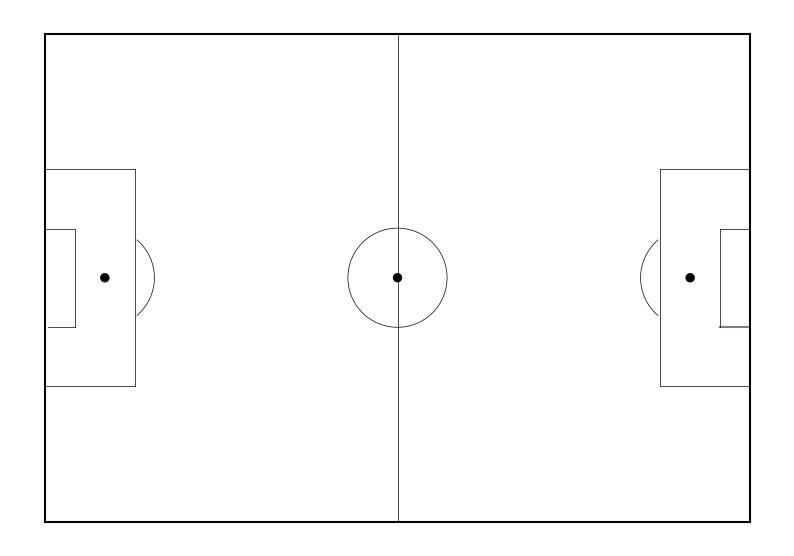

In [47]:
def plot_field(ax, color):

    #Pitch Outline & Centre Line
    ax.plot([0,0],[0,90], color=color)
    ax.plot([0,130],[90,90], color=color)
    ax.plot([130,130],[90,0], color=color)
    ax.plot([130,0],[0,0], color=color)
    ax.plot([130/2,130/2],[0,90], color=color, linewidth=0.5)

    #Left Penalty Area
    ax.plot([16.5,16.5],[130/2,25],color=color, linewidth=0.5)
    ax.plot([0,16.5],[130/2,130/2],color=color, linewidth=0.5)
    ax.plot([16.5,0],[25,25],color=color, linewidth=0.5)
        
    #Right Penalty Area
    ax.plot([130,113.5],[130/2,130/2],color=color, linewidth=0.5)
    ax.plot([113.5,113.5],[130/2,25],color=color, linewidth=0.5)
    ax.plot([113.5,130],[25,25],color=color, linewidth=0.5)
        
    #Left 6-yard Box
    ax.plot([0,5.5],[54,54],color=color, linewidth=0.5)
    ax.plot([5.5,5.5],[54,36],color=color, linewidth=0.5)
    ax.plot([5.5,0.5],[36,36],color=color, linewidth=0.5)
        
    #Right 6-yard Box
    ax.plot([130,124.5],[54,54],color=color, linewidth=0.5)
    ax.plot([124.5,124.5],[54,36],color=color, linewidth=0.5)
    ax.plot([124.5,130],[36,36],color=color, alpha=0.5)
        
    #Prepare Circles
    centreCircle = plt.Circle((130/2,90/2),9.15,color=color,fill=False, linewidth=0.5)
    centreSpot = plt.Circle((130/2,90/2),0.8,color=color, linewidth=0.5)
    leftPenSpot = plt.Circle((11,90/2),0.8,color=color, linewidth=0.5)
    rightPenSpot = plt.Circle((119,90/2),0.8,color=color, linewidth=0.5)
        
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
     
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=color, linewidth=0.5)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=color, linewidth=0.5)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
      
    #Delete Axes
    ax.axis('off')
    
    #Set aspect equal
    ax.set_aspect('equal')

    return (ax)

fig, ax = plt.subplots(figsize=(10,10))
plot_field(ax, color='black')

In [138]:
pressure_cols = ['tkl_z1_zscore', 'tkl_z2_zscore', 'tkl_z3_zscore']
group = arg.groupby(['Opponent'] + pressure_cols)    
group_ordened = group.last().index
group_ordened
    # for squad_data in group_ordened:
    #     selection = group.get_group(squad_data)

MultiIndex([( 'bo Bolivia', 0.27797304533441186,    1.925183887253943, ...),
            (   'cl Chile',  0.5300726829299274,  -0.9843080146515174, ...),
            ( 'ec Ecuador', -1.8526368330881253,  -0.3039977821962652, ...),
            ('py Paraguay',  1.0984489232367516, -0.19681826171884448, ...),
            ( 'uy Uruguay', -0.0538578184129681,  -0.4400598286873156, ...)],
           names=['Opponent', 'tkl_z1_zscore', 'tkl_z2_zscore', 'tkl_z3_zscore'])

In [155]:
#for the pitch I used FCPython tutorial and adapted it for my means. Link: https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
#function variables are length, width and color of the pitch.

def press_viz(data, metric, league, how, cols, color):
    
    #set plot style
    plt.style.use('default')

    #create figure
    # counts how many teams there are in the df
    cols = cols
    rows = (len(data.index.unique()) // cols) + (len(data.index.unique()) % cols > 0) 
    #rows = 4

    # open figure
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
    axes_list = [item for sublist in axes for item in sublist]

    if how == 'z score':
        if metric == 'Entradas':
            pressure_cols = ['tkl_z1_zscore', 'tkl_z2_zscore', 'tkl_z3_zscore']
        elif metric == 'Presiones':
            pressure_cols = ['press_z1_zscore', 'press_z2_zscore', 'press_z3_zscore']

        #use the groupby and loop thru it to plot data of each team in each subplot
        # if 'Effective Pressure%' in list(data.columns):  
        #    group = data.groupby(['Squad','Minutes played','Effective Pressure%'] + pressure_cols)
        # elif 'Tackles Won%' in list(data.columns):
        #    group = data.groupby(['Squad','Minutes played','Tackles Won%'] + pressure_cols)
        
        group = data.groupby(['Squad','Minutes played'] + pressure_cols)
        group_ordened = group.last().index # ['Squad']

        #set title
        title = '{metric} ejercidas respecto la media'.format(metric=metric)

    else:
        if metric == 'Entradas':
            pressure_cols = ['tkl_z1', 'tkl_z2', 'tkl_z3']
        elif metric == 'Presiones':
            pressure_cols = ['press_z1', 'press_z2', 'press_z3']

            #use the groupby and loop thru it to plot data of each team in each subplot
        # if 'Effective Pressure%' in list(data.columns):  
        #     group = data.groupby(['Squad','Minutes played','Effective Pressure%'] + pressure_cols)
        # elif 'Tackles Won%' in list(data.columns):
        #     group = data.groupby(['Squad','Minutes played','Tackles Won%'] + pressure_cols)

        group = data.groupby(['Squad','Minutes played'] + pressure_cols)    
        group_ordened = group.last().index #['Squad']

        #set title
        title = 'Porcentaje de {metric} ejercidas'.format(metric=metric) 

    for squad_data in group_ordened:
        selection = group.get_group(squad_data)

        ax = axes_list.pop(0)

        ## PLOT FIELD
        plot_field(ax, color='black')

        #COLOR
        #Set color by pressure percentages and normalize by the max and min values.
        colors = data[pressure_cols].values
        normal = plt.Normalize(colors.min(), colors.max())
        cmap=plt.cm.Reds #coolwarm
        
        #Plot pressure for each team
        im = ax.imshow(selection[pressure_cols], zorder=0, aspect="auto", extent=(0,130,0,90), cmap=cmap, norm=normal, alpha=0.9)

        #Set titles
        ax.set_title(squad_data[0] + "\n" + str(squad_data[1]).split(".")[0], fontsize=14, weight='bold') # + "\nEfectividad: " + str(squad_data[2] # + " min. jugados"
        
        if how != 'z score':
            #Annotate the percentage value
            counter = 0
            for i in range(2,5):
                ax.annotate(str(squad_data[i]) + '%', xy=(counter + 130/6, 90/6), color='black', fontsize=14, ha='center', va='center', weight='bold')
                counter += 130/3
        
        else:
            pass

        #set aspect equal
        ax.set_aspect('equal')

    for ax in axes_list:
        ax.remove()

    #color bar
    #fmt = cbar.ticker.PercentFormatter()

    if how == 'z score':
        cax = fig.add_axes([1.02,0.5,0.02,0.2]) #vertical
        #cax = fig.add_axes([0.1,-0.02,0.8,0.02]) #horizontal
        cax.set_title('Z score', rotation=0)
        cb2 = fig.colorbar(im, cax=cax, cmap=cmap, alpha=0.9, orientation='vertical') #format=fmt
        cb2.ax.tick_params(size=0)
        #cbar.ColorbarBase

        # # Get the default ticks and tick labels
        # ticklabels = cb2.ax.get_ymajorticklabels()
        # ticks = list(cb2.get_ticks())

        # # Append the ticks (and their labels) for minimum and the maximum value
        # cb2.set_ticks([colors.min(), colors.max()] + ticks)
        # cb2.set_ticklabels([round(colors.min(),1), round(colors.max(),1)] + ticks)

    else:
        pass

    #plot direction of play
    #plt.annotate('Dirección de ataque', xy=(600,7), xycoords='figure points', xytext=(400, 7/2), 
    #            arrowprops=dict(arrowstyle="->", color=color))
    #plt.annotate('Dirección de ataque de izquierda a derecha', xy=(50,50), xycoords='figure points')

    # adjust subplots in the figure 
    # plt.tight_layout()

    #plot main titles
    plt.figtext(0,1.02,'{title} en tres zonas del campo'.format(title=title), fontsize=18, ha='left', weight='bold', color=color) # 1.01
    plt.figtext(0,1.0090, '{league} | Temporada 2020/21 | Dirección de ataque de izquierda a derecha'.format(league=league), fontsize=12, fontstyle='italic', ha='left', weight='bold', color=color) # 0.995

    #plot credits
    plt.figtext(1.0,1.02,'By: Renzo Cammi (@cammi_renzo)',
                ha='right',fontsize=10, color=color)
    plt.figtext(1.0,1.0090,'Data: StatsBomb via FBref',
                ha='right', fontsize=10, color=color)

    # #adjust subplots in the figure 
    plt.tight_layout()

    #save figure
    plt.savefig('{metric}_3Z_{league}_{how}_adj.png'.format(league=league,metric=metric,how=how), bbox_inches="tight", dpi=300)

    #Display Pitch
    plt.show()

<ipython-input-133-d695783b49c3>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


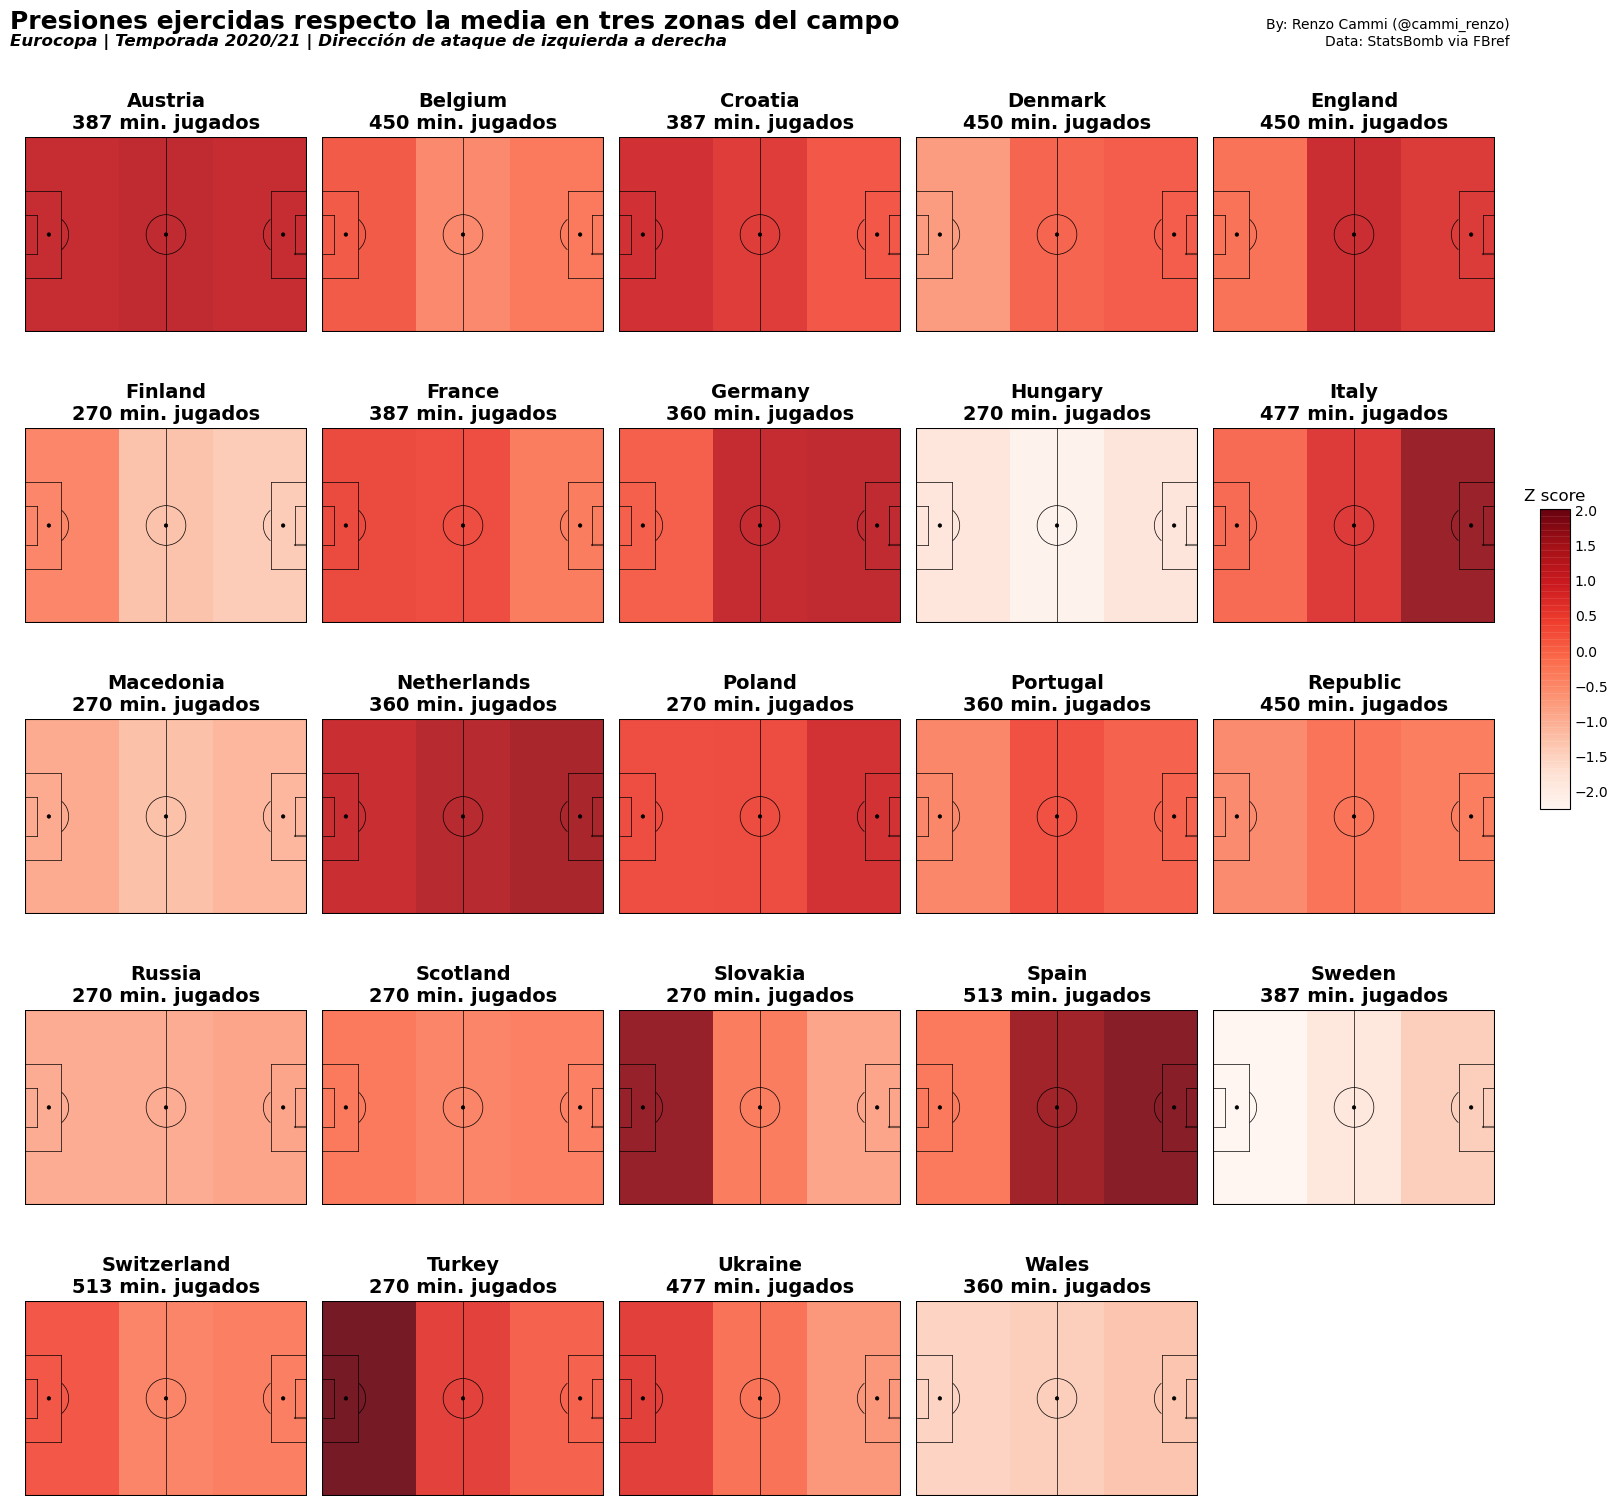

In [136]:
data = df_clean
press = press_viz(data, league='Eurocopa', metric="Presiones", how='z score', cols=5, color='black')

In [84]:
url = "https://fbref.com/en/squads/f9fddd6e/2021/matchlogs/s10344/defense/Argentina-Match-Logs-Copa-America#matchlogs_for"
arg_matches = load(url)

In [92]:
arg_matches = arg_matches.dropna(how="all", axis=0).iloc[0:-1]

In [93]:
arg_matches

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Match Report
0,2021-06-14,18:00,Group stage,Mon,Neutral,D,1.0,1.0,cl Chile,12.0,6.0,8.0,0.0,4.0,6.0,9.0,66.7,3.0,139.0,41.0,29.5,41.0,61.0,37.0,7.0,0.0,0.0,7.0,12.0,NaN,30.0,0.0,Match Report
1,2021-06-18,21:00,Group stage,Fri,Neutral,W,1.0,0.0,uy Uruguay,16.0,11.0,8.0,4.0,4.0,7.0,11.0,63.6,4.0,104.0,36.0,34.6,39.0,41.0,24.0,14.0,2.0,0.0,12.0,11.0,NaN,17.0,0.0,Match Report
2,2021-06-21,21:00,Group stage,Mon,Neutral,W,1.0,0.0,py Paraguay,22.0,13.0,12.0,7.0,3.0,7.0,21.0,33.3,14.0,165.0,46.0,27.9,67.0,60.0,38.0,29.0,5.0,0.0,24.0,16.0,NaN,13.0,0.0,Match Report
3,2021-06-28,20:00,Group stage,Mon,Neutral,W,4.0,1.0,bo Bolivia,14.0,10.0,4.0,10.0,0.0,1.0,5.0,20.0,4.0,131.0,45.0,34.4,35.0,59.0,37.0,10.0,3.0,0.0,7.0,18.0,NaN,11.0,0.0,Match Report
5,2021-07-03,22:00,Quarter-finals,Sat,Neutral,W,3.0,0.0,ec Ecuador,14.0,10.0,5.0,5.0,4.0,7.0,12.0,58.3,5.0,94.0,24.0,25.5,33.0,39.0,22.0,10.0,1.0,0.0,9.0,12.0,NaN,35.0,0.0,Match Report


In [142]:
url = "https://fbref.com/en/squads/f9fddd6e/2021/matchlogs/s10344/possession/Argentina-Match-Logs-Copa-America#matchlogs_for"
arg_pos_matches = load(url)

In [143]:
arg_pos_matches = arg_pos_matches.dropna(how="all", axis=0).iloc[0:-1]

In [144]:
arg_pos_matches

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Match Report
0,2021-06-14,18:00,Group stage,Mon,Neutral,D,1.0,1.0,cl Chile,48.0,499.0,49.0,147.0,213.0,171.0,27.0,444.0,7.0,15.0,46.7,8.0,1.0,299.0,1856.0,1003.0,47.0,16.0,6.0,4.0,3.0,368.0,308.0,83.7,26.0,Match Report
1,2021-06-18,21:00,Group stage,Fri,Neutral,W,1.0,0.0,uy Uruguay,46.0,598.0,63.0,204.0,266.0,177.0,25.0,553.0,21.0,31.0,67.7,23.0,0.0,472.0,2518.0,1369.0,53.0,24.0,7.0,10.0,17.0,440.0,402.0,91.4,28.0,Match Report
2,2021-06-21,21:00,Group stage,Mon,Neutral,W,1.0,0.0,py Paraguay,43.0,584.0,62.0,213.0,262.0,147.0,10.0,542.0,11.0,27.0,40.7,13.0,0.0,347.0,1862.0,974.0,29.0,14.0,1.0,18.0,14.0,427.0,378.0,88.5,29.0,Match Report
3,2021-06-28,20:00,Group stage,Mon,Neutral,W,4.0,1.0,bo Bolivia,68.0,957.0,51.0,257.0,479.0,284.0,42.0,932.0,22.0,27.0,81.5,23.0,0.0,709.0,3273.0,1786.0,87.0,26.0,8.0,5.0,11.0,848.0,783.0,92.3,39.0,Match Report
5,2021-07-03,22:00,Quarter-finals,Sat,Neutral,W,3.0,0.0,ec Ecuador,46.0,444.0,48.0,128.0,207.0,138.0,26.0,401.0,7.0,14.0,50.0,8.0,1.0,293.0,1539.0,939.0,38.0,10.0,7.0,8.0,16.0,303.0,256.0,84.5,20.0,Match Report


In [145]:
arg_pos_matches = arg_pos_matches[["Date","Round","Opponent","Poss"]]

In [146]:
arg_pos_matches

,Date,Round,Opponent,Poss
0,2021-06-14,Group stage,cl Chile,48.0
1,2021-06-18,Group stage,uy Uruguay,46.0
2,2021-06-21,Group stage,py Paraguay,43.0
3,2021-06-28,Group stage,bo Bolivia,68.0
5,2021-07-03,Quarter-finals,ec Ecuador,46.0


In [147]:
arg = clean_data(arg_matches,arg_pos_matches,'matches')

In [152]:
arg["Squad"] = arg["Opponent"].apply(lambda x: x.split(" ")[-1])
arg["Minutes played"] = arg["Date"] + " | " + arg["Round"]

In [153]:
arg

,Date,Poss,Time,Round,Day,Venue,Result,GF,GA,Opponent,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Match Report,Tackles Won%,Pos_sig,Tkl_adj,TklW_adj,Tkl_mid_adj,Tkl_att_adj,Tkl_def_adj,Press_mid_adj,Press_att_adj,Press_def_adj,Press_adj,Press_Suc_adj,Tkl%_adj,Press%_adj,press_z1,press_z2,press_z3,tkl_z1,tkl_z2,tkl_z3,press_z1_zscore,press_z2_zscore,press_z3_zscore,tkl_z1_zscore,tkl_z2_zscore,tkl_z3_zscore,Squad,Minutes played
0,2021-06-14,48.0,18:00,Group stage,Mon,Neutral,D,1.0,1.0,cl Chile,12.0,6.0,8.0,0.0,4.0,6.0,9.0,66.7,3.0,139.0,41.0,29.5,41.0,61.0,37.0,7.0,0.0,0.0,7.0,12.0,NaN,30.0,0.0,Match Report,7.1,2.221403,10.803984,5.401992,0.000000,3.601328,7.202656,54.920252,33.312284,36.913612,125.146149,36.913612,50.000000,29.496403,29.5,43.9,26.6,66.7,0.0,33.3,-0.249647,0.110764,0.090674,0.530073,-0.984308,0.909541,Chile,2021-06-14 | Group stage
1,2021-06-18,46.0,21:00,Group stage,Fri,Neutral,W,1.0,0.0,uy Uruguay,16.0,11.0,8.0,4.0,4.0,7.0,11.0,63.6,4.0,104.0,36.0,34.6,39.0,41.0,24.0,14.0,2.0,0.0,12.0,11.0,NaN,17.0,0.0,Match Report,13.8,2.491825,12.841995,8.828871,3.210499,3.210499,6.420997,32.907612,19.262992,31.302363,83.472967,28.894488,68.750000,34.615385,37.5,39.4,23.1,50.0,25.0,25.0,-0.727167,-0.736309,-0.746580,-0.053858,-0.440060,0.612988,Uruguay,2021-06-18 | Group stage
2,2021-06-21,43.0,21:00,Group stage,Mon,Neutral,W,1.0,0.0,py Paraguay,22.0,13.0,12.0,7.0,3.0,7.0,21.0,33.3,14.0,165.0,46.0,27.9,67.0,60.0,38.0,29.0,5.0,0.0,24.0,16.0,NaN,13.0,0.0,Match Report,25.0,3.013753,14.599738,8.627118,4.645371,1.990873,7.963493,39.817467,25.217729,44.462839,109.498035,30.526725,59.090909,27.878788,40.6,36.4,23.0,54.5,31.8,13.6,0.392796,-0.470409,-0.391713,1.098449,-0.196818,-0.312440,Paraguay,2021-06-21 | Group stage
3,2021-06-28,68.0,20:00,Group stage,Mon,Neutral,W,4.0,1.0,bo Bolivia,14.0,10.0,4.0,10.0,0.0,1.0,5.0,20.0,4.0,131.0,45.0,34.4,35.0,59.0,37.0,10.0,3.0,0.0,7.0,18.0,NaN,11.0,0.0,Match Report,14.1,1.165299,24.028170,17.162979,17.162979,0.000000,6.865191,101.261574,63.503021,60.070425,224.835021,77.233404,71.428571,34.351145,26.7,45.0,28.2,28.6,71.4,0.0,1.721009,1.894034,1.889863,0.277973,1.925184,-1.823076,Bolivia,2021-06-28 | Group stage
4,2021-07-03,46.0,22:00,Quarter-finals,Sat,Neutral,W,3.0,0.0,ec Ecuador,14.0,10.0,5.0,5.0,4.0,7.0,12.0,58.3,5.0,94.0,24.0,25.5,33.0,39.0,22.0,10.0,1.0,0.0,9.0,12.0,NaN,35.0,0.0,Match Report,20.8,2.491825,11.236746,8.026247,4.013123,3.210499,4.013123,31.302363,17.657743,26.486614,75.446720,19.262992,71.428571,25.531915,35.1,41.5,23.4,35.7,35.7,28.6,-1.136990,-0.798080,-0.842244,-1.852637,-0.303998,0.612988,Ecuador,2021-07-03 | Quarter-finals


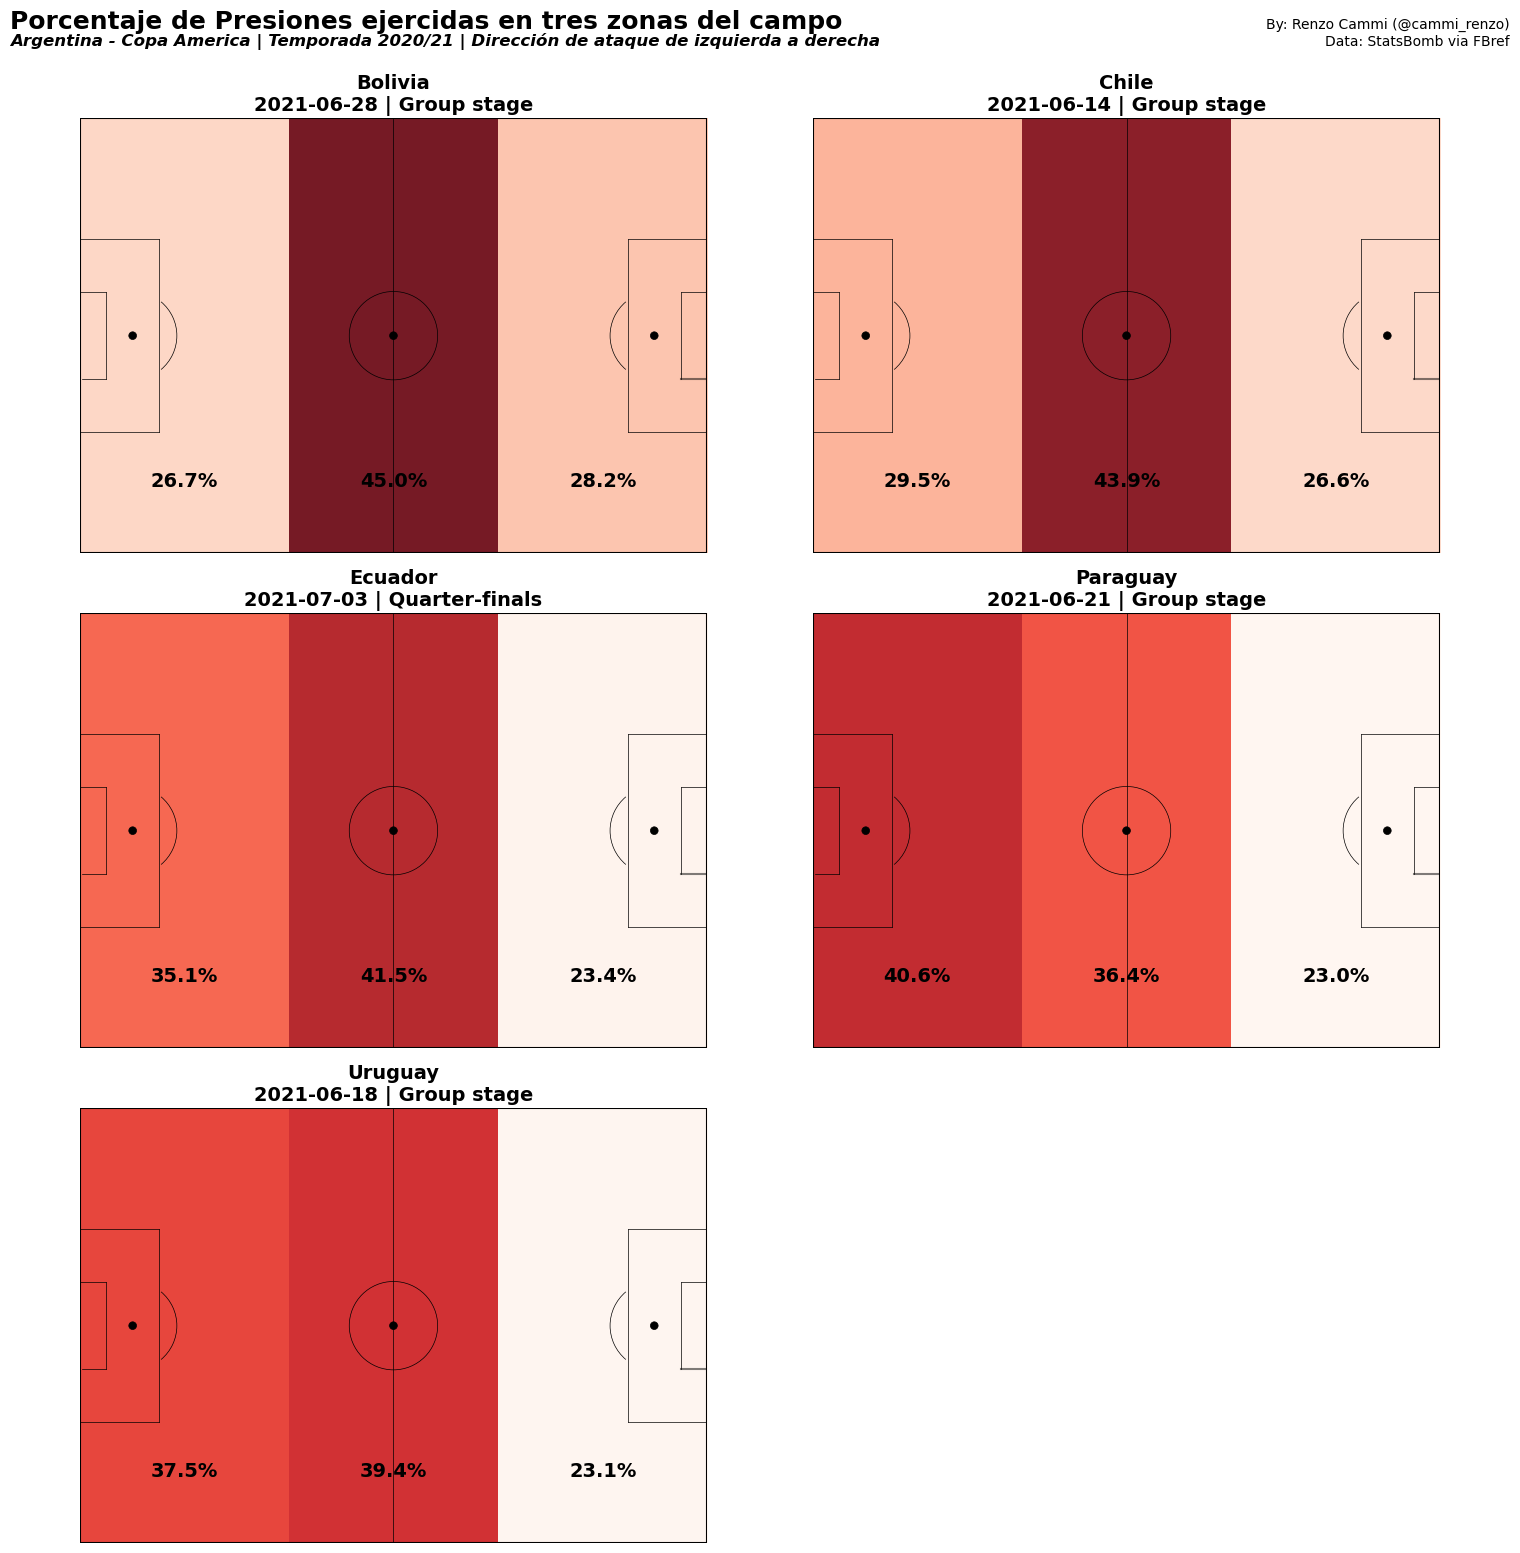

In [161]:
press = press_viz(arg, league='Argentina - Copa America', metric="Presiones", how='', cols=2, color='black')